# I$_{3322}$

Bell inequalities are central tools for studying nonlocal correlations and their applications in quantum information processing [1]. Identifying inequalities for many particles or measurements is, however,
difficult due to the computational complexity of characterizing the set of local correlations.

We use a method to characterize Bell inequalities under constraints, which may be given by symmetry
or other linear conditions. This allows to search systematically for generalizations of given Bell inequalities to more parties.
 As our case, we use the known as $I_{3322}$ inequality, to three
particles.

If one considers two parties with two
measurements ($A_1$,$A_2$ y $B_1$,$B_2$) and two outcomes $(\pm 1)$, it is well known that there is, up to relabelings
and permutations, only one optimal Bell inequality,
known as the Clauser-Horne-Shimony-Holt (CHSH) inequality. It reads: 

\begin{equation}
    \left\langle A_1B_1 \right \rangle
    +\left\langle A_1B_2 \right \rangle
    +\left\langle A_2B_1 \right \rangle
    -\left\langle A_2B_2 \right \rangle
    \leq 2
\end{equation}

If one considers two particles with three measurements,
the analysis becomes already considerably harder. It was
shown that there is only one additional Bell inequality.
It reads

\begin{equation}
    \left\langle A_1 \right \rangle
    -\left\langle A_2 \right \rangle
    +\left\langle B_1 \right \rangle
    -\left\langle B_2 \right \rangle
    -\left\langle (A_1-A_2)(B_1-B_2) \right \rangle
    +\left\langle (A_1+A_2)B_3 \right \rangle
     +\left\langle A_3(B_1+B_2) \right \rangle
    \leq 4
\end{equation}

This inequality, henceforth called $I_{3322}$ inequality, has
several interesting properties:

>1. It detects the nonlocality
of some two-qubit states which are not detected by the
CHSH inequality , and, for higher dimensions, the
maximal violation of it is not attained at maximally entangled states.
>
>1. In general, the violation of $I_{3322}$ is
conjectured to increase with the dimension of the underlying quantum system and, since the maximal
violation can definitely not occur in small-dimensional
systems.
>
>1. $I_{3322}$  can be used for the deviceindependent characterization of the dimension. 

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

# GHZ

A Greenberger–Horne–Zeilinger state (GHZ state) is a certain type of entangled quantum state that involves at least three subsystems (particle states, qubits, or qudits)[2].We consider a three-qubit system, with a qubit each with Alice, Bob and Charlie.we will consider three different classes of states
– product states, pure biseparable states, and states with genuine tripartite entanglement. We will see how our inequalities can
distinguish these classes of states. In addition, we shall consider
generalized GHZ states:

\begin{equation}
   \ket{GGHZ}=\alpha\ket{000}+\beta\ket{111}
\end{equation}

Theses states are symmetric under the permutation of particles; so we can pick any of the inequalities. All
will be violated in the same manner.We have the following properties:


>1. All generalized GHZ states violate all six inequalities of
this set.
>   * Since the states are symmetric under the permutations of particles, we can choose any Bell inequality from the set. We choose, for example
the inequality:
\begin{equation}
A_1(B_1+B_2)+A_2(B_1-B_2)C_1\leq 2
\end{equation}
>
>1. Any separable pure three-qubit state obeys all the inequalities within the set.
>    
>1. All biseparable pure three-qubit states violate exactly
two inequalities within the set and the amount of maximal violation are
same for both.
>
>1. For all genuine tripartite entangled states, we have violation within the set.

We can generalize this set of
inequalities to n-qubit states.
>1. Multiqubit extension of the inequalities are violated by
multiqubit generalized GHZ states.

### Using three-partite GHZ states for partial quantum error detection.

The problem of noise incidence on qubits taking part of bipartite entanglement-based
protocols is addressed[3]. It is shown that the use of a three-partite GHZ state and measurements instead of their EPR counterparts allows the experimenter to detect 2/3 of
the times whenever one of the qubits involved in the measurement is affected by bitflip noise through the mere observation of unexpected outcomes in the teleportation
and superdense coding protocols when compared to the ideal case. 

We can do the experimental realization of automated error correction is demonstrated through IBM Quantum  Experience for Bell and GHZ states using a measurement based approach upon ancilla qubits[4]. The  measurement automatically activates error correcting unitary operations to restore the system to  its original entangled state.

In [1]:
#!/usr/bin/env python3

from qiskit import*
from inequality_checker.circuit_maker import*
from inequality_checker.graphs_tools import*

In [2]:
proc = Aer.get_backend('qasm_simulator')

In [3]:
def circ(theta,ch):
    q = QuantumCircuit(2,2)
    q.h(1)
    q.cx(1,0)
    q.barrier()
    q.ry(theta,1)
    q.barrier()

    if ch=='AB':    
        q.measure([0,1],[0,1]) # Para A ,B
    if ch=='Ab':
        q.h(1)
        q.measure([0,1],[0,1]) # Para A ,b

    if ch=='aB':
        q.h(0)
        q.measure([0,1],[0,1]) # Para a,B
        
    if ch=='ab':
        q.h([0,1])
        q.measure([0,1],[0,1]) # Para a,b
        
    return q

def E2(n_shots,ch,theta):
    job = execute(circ(theta,ch),proc,shots=n_shots)
    counts = job.result().get_counts()
    p00 = counts.get('00',0)/(n_shots)
    p01 = counts.get('01',0)/(n_shots)
    p10 = counts.get('10',0)/(n_shots)
    p11 = counts.get('11',0)/(n_shots)
    return p00+p11-(p01+p10)

def CHSH(theta):
    n_shots = 1000
    EAB = E2(n_shots,'AB',theta)
    EAb = E2(n_shots,'Ab',theta)
    EaB = E2(n_shots,'aB',theta)
    Eab = E2(n_shots,'ab',theta)
        
    return EAB+Eab-EAb+EaB


def circ3(ch,alpha,beta):
    q = QuantumCircuit(3,3)
    q.h(0)
    q.cx(0,1)
    q.cx(0,2)
    q.barrier()
    q.ry(alpha,1)
    q.ry(beta,2)
    q.barrier()

    if ch=='ABC':    
        q.measure([0,1,2],[0,1,2]) # Para A, B, C
    if ch=='ABc':
        q.h(2)
        q.measure([0,1,2],[0,1,2]) # Para A, B, c
    if ch=='AbC':
        q.h(1)
        q.measure([0,1,2],[0,1,2]) # Para A, B, c
    if ch=='Abc':
        q.h(1)
        q.h(2)
        q.measure([0,1,2],[0,1,2]) # Para A, B, c
    if ch=='aBC':
        q.h(0)
        q.measure([0,1,2],[0,1,2]) # Para A, B, c
    if ch=='aBc':
        q.h(0)
        q.h(2)
        q.measure([0,1,2],[0,1,2]) # Para A, B, c
    if ch=='abC':
        q.h(0)
        q.h(1)
        q.measure([0,1,2],[0,1,2]) # Para A, B, c
    if ch=='abc':
        q.h(0)
        q.h(1)
        q.h(2)
        q.measure([0,1,2],[0,1,2]) # Para A, B, c
    return q

def E33(n_shots,ch,alpha,beta):
    job = execute(circ3(ch,alpha,beta),proc,shots=n_shots)
    counts = job.result().get_counts()
    p000 = counts.get('000',0)/(n_shots)
    p001 = counts.get('001',0)/(n_shots)
    p010 = counts.get('010',0)/(n_shots)
    p011 = counts.get('011',0)/(n_shots)
    p100 = counts.get('100',0)/(n_shots)
    p101 = counts.get('101',0)/(n_shots)
    p110 = counts.get('110',0)/(n_shots)
    p111 = counts.get('111',0)/(n_shots)
    return p000+p011+p101+p110-(p001+p010+p100+p111)

def E32(n_shots,ch,alpha,beta):
    job = execute(circ3(ch+'c',alpha,beta),proc,shots=n_shots)
    counts = job.result().get_counts()
    p000 = counts.get('000',0)/(n_shots)
    p001 = counts.get('001',0)/(n_shots)
    p010 = counts.get('010',0)/(n_shots)
    p011 = counts.get('011',0)/(n_shots)
    p100 = counts.get('100',0)/(n_shots)
    p101 = counts.get('101',0)/(n_shots)
    p110 = counts.get('110',0)/(n_shots)
    p111 = counts.get('111',0)/(n_shots)
    return p000+p001+p110+p111-(p010+p011+p100+p101)

def GHZ(alpha,beta):
    n_shots = 2000
    EABC = E33(n_shots,'ABC',alpha,beta)
    EABc = E33(n_shots,'ABc',alpha,beta)
    EAbC = E33(n_shots,'AbC',alpha,beta)
    EAbc = E33(n_shots,'Abc',alpha,beta)
    EaBC = E33(n_shots,'aBC',alpha,beta)
    EaBc = E33(n_shots,'aBc',alpha,beta)
    EabC = E33(n_shots,'abC',alpha,beta)
    Eabc = E33(n_shots,'abc',alpha,beta)
    EAB = E32(n_shots,'AB',alpha,beta)
    EAb = E32(n_shots,'Ab',alpha,beta)
        
    return EAB+EAb+EaBC-EabC

In [9]:
Sabxy = [(1,-1,-1,1), 
         (-1,1,1,-1), 
         (1,-1,-1,1), 
         (1,-1,-1,1)
        ];
GHZxyz = [(0, 0, 0, 0, 0, 0, 0, 0),
          (1, 1,-1,-1,-1,-1, 1, 1),
          (0, 0, 0, 0, 0, 0, 0, 0),
          (1, 1,-1,-1,-1,-1, 1, 1),
          (1,-1,-1, 1,-1, 1, 1,-1),
          (0, 0, 0, 0, 0, 0, 0, 0),
          (-1,1, 1,-1, 1,-1,-1, 1),
          (0, 0, 0, 0, 0, 0, 0, 0)
         ];

In [4]:
a = [i*np.pi/10 for i in range(0,21)]
b = [j*np.pi/10 for j in range(0,21)]

s = [[GHZ(i,j) for j in a] for i in tqdm(b)]

100%|██████████| 21/21 [00:47<00:00,  2.24s/it]


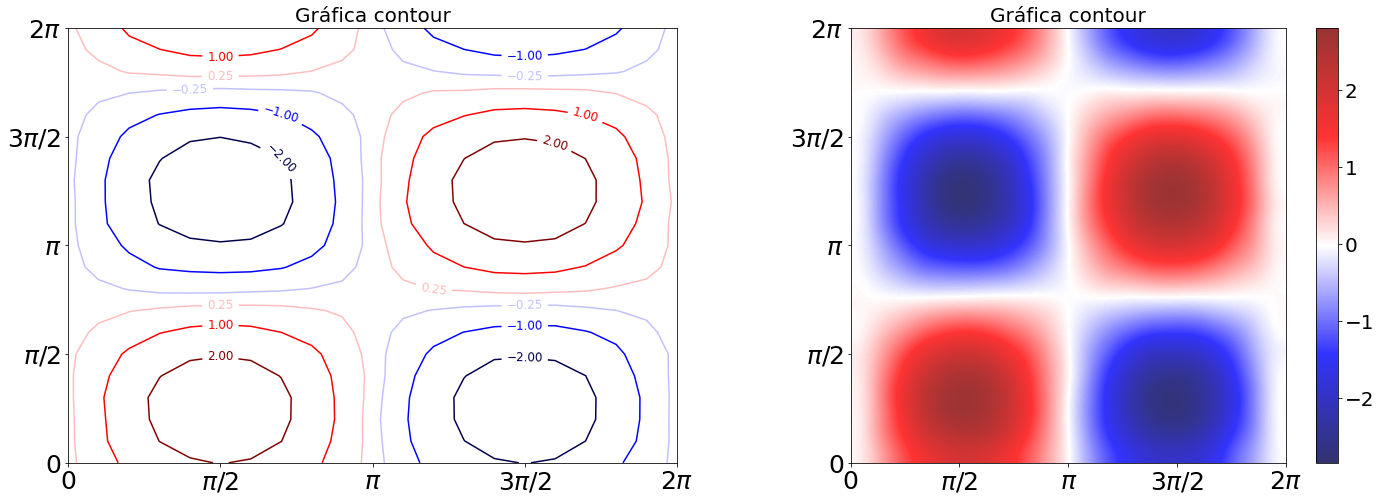

In [5]:
S = 2.0;
g2D(S=S,x=a,y=b,v=s)

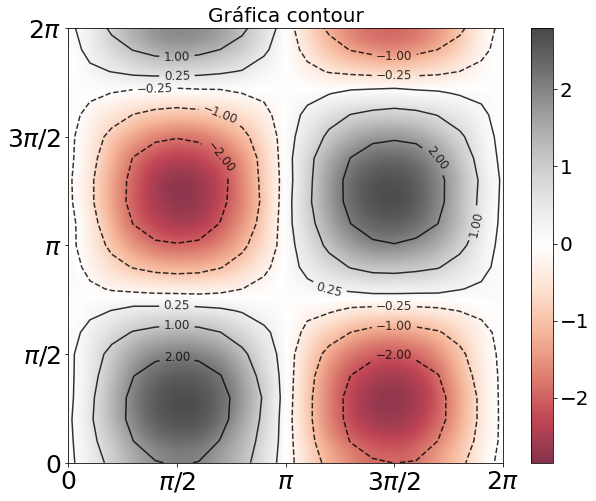

In [6]:
S = 2;
g2D_2(S=S,x=a,y=b,v=s)

In [6]:
S = 2;
t = np.linspace(0,2*np.pi,7);
v = [GHZ(i,np.pi/2) for i in t];

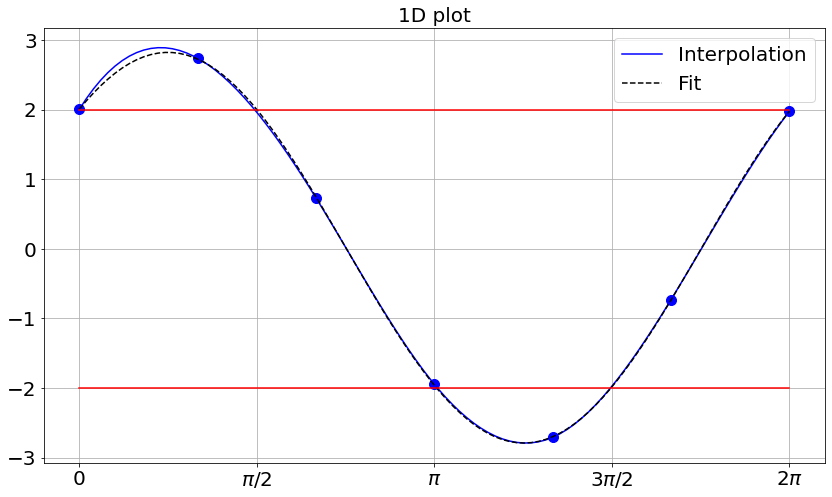

In [7]:
g1D(S=S,t=t,v=v)
plt.show()

## References
[1] Fabian Bernards and Otfried G ̈uhne. “Generalizing Optimal Bell Inequalities”. In: Phys.
Rev. Lett. 125 (20 Nov. 2020), p. 200401. doi: 10.1103/PhysRevLett.125.200401.
url: https://link.aps.org/doi/10.1103/PhysRevLett.125.200401.
[2] Arpan Das, Chandan Datta, and Pankaj Agrawal. “New Bell inequalities for three-
qubit pure states”. In: Physics Letters A 381.47 (2017), pp. 3928–3933. issn: 0375-
9601. doi: https : / / doi . org / 10 . 1016 / j . physleta . 2017 . 10 . 023. url: https :
//www.sciencedirect.com/science/article/pii/S0375960117310198.

[3] M. G. Moreno, Alejandro Fonseca, and M ́arcio M. Cunha. “Using Three-Partite GHZ
States for Partial Quantum Error Detection in Entanglement-Based Protocols”. In:
Quantum Information Processing 17.8 (Aug. 2018), pp. 1–14. issn: 1570-0755. doi:
10.1007/s11128-018-1960-4. url: https://doi.org/10.1007/s11128-018-1960-4.

[4] Debjit Ghosh et al. “Automated Error Correction in IBM Quantum Computer and
Explicit Generalization”. In: Quantum Information Processing 17 (May 2018). doi:
10.1007/s11128-018-1920-z.